In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime
tf.__version__

# mnist data 저장
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# Data set = 784(28x28)

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
# Hyper-Parameter

# 학습율
learning_rate = 0.001

# 반복횟수
epochs = 30   

# 배치사이즈
batch_size = 100      

In [3]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위한 reshape
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)

In [5]:
# 1번째 컨볼루션 층
 
# 필터 사이즈 = 3X3  ,  필터 갯수 = 32개
W2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling  :  28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
# 2번째 컨볼루션 층

# 필터 사이즈 = 3X3  ,  필터 갯수 : 64개
W3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[64]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
# 이 이상 컨볼루션 층을 추가한다면 패딩이 적용되어 2X2에 맞는 형태로 늘어난다
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
# 3번째 컨볼루션 층

# 필터사이즈 = 5X5 , 필터 갯수 : 128개
W4 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.01))  
b4 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z4 = tf.nn.relu(C4+b4)

# 3번째 max pooling을 통해 7 X 7 X 128 => 4 X 4 X 128
A4 = P4 = tf.nn.max_pool(Z4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [8]:
# 4X4 크기를 가진 128개의 activation map을 flatten

A4_flat = P4_flat = tf.reshape(A4, [-1, 128*4*4])

In [9]:
# 512 개의 노드 완전연결
W5 = tf.Variable(tf.random_normal([128*4*4, 512], stddev=0.01))
b5 = tf.Variable(tf.random_normal([512]))

Z5 = tf.matmul(A4_flat, W5) + b5

A5 = tf.nn.relu(Z5)

In [10]:
# 출력층
W6 = tf.Variable(tf.random_normal([512, 10], stddev=0.01))
b6 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z6, 즉 softmax 에 들어가는 입력 값
Z6 = logits = tf.matmul(A5, W6) + b6

y = A6 = tf.nn.softmax(Z6)

In [11]:
# 손실함수
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z6, labels=T) )

# 활성함수
optimizer = tf.train.AdamOptimizer(learning_rate)

# 학습(손실함수 최소화)
train = optimizer.minimize(loss)  

In [12]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A6, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 
predicted_list = tf.argmax(A6, 1)

In [13]:
#예측값 저장을 위한 빈 리스트 생성
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    #학습 시간 출력
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    #학습된 데이터의 accuracy, 예측값과 인덱스값 을 리스트에 저장
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    
    temp_list = [] 
    # 오류값 저장
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            # 세션이 끝나고 삭제
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.981554
epochs =  0 , step =  100 , loss_val =  1.2412113
epochs =  0 , step =  200 , loss_val =  0.27898702
epochs =  0 , step =  300 , loss_val =  0.164708
epochs =  0 , step =  400 , loss_val =  0.03718082
epochs =  0 , step =  500 , loss_val =  0.052827407
epochs =  1 , step =  0 , loss_val =  0.086579226
epochs =  1 , step =  100 , loss_val =  0.02923998
epochs =  1 , step =  200 , loss_val =  0.030764868
epochs =  1 , step =  300 , loss_val =  0.005420519
epochs =  1 , step =  400 , loss_val =  0.053948466
epochs =  1 , step =  500 , loss_val =  0.066470936
epochs =  2 , step =  0 , loss_val =  0.0648536
epochs =  2 , step =  100 , loss_val =  0.020592066
epochs =  2 , step =  200 , loss_val =  0.037777033
epochs =  2 , step =  300 , loss_val =  0.054448627
epochs =  2 , step =  400 , loss_val =  0.036366254
epochs =  2 , step =  500 , loss_val =  0.04187132
epochs =  3 , step =  0 , loss_val =  0.009044969
epochs =  3 , step =  100 , loss_v

epochs =  25 , step =  500 , loss_val =  0.0013461316
epochs =  26 , step =  0 , loss_val =  0.0053327703
epochs =  26 , step =  100 , loss_val =  9.233374e-05
epochs =  26 , step =  200 , loss_val =  5.2079005e-05
epochs =  26 , step =  300 , loss_val =  1.7311375e-05
epochs =  26 , step =  400 , loss_val =  6.954533e-06
epochs =  26 , step =  500 , loss_val =  0.003351121
epochs =  27 , step =  0 , loss_val =  2.0421541e-05
epochs =  27 , step =  100 , loss_val =  0.0015283205
epochs =  27 , step =  200 , loss_val =  0.0046492084
epochs =  27 , step =  300 , loss_val =  9.7614124e-05
epochs =  27 , step =  400 , loss_val =  4.7087065e-07
epochs =  27 , step =  500 , loss_val =  1.5202938e-05
epochs =  28 , step =  0 , loss_val =  0.00024489177
epochs =  28 , step =  100 , loss_val =  2.535621e-05
epochs =  28 , step =  200 , loss_val =  0.0001603178
epochs =  28 , step =  300 , loss_val =  0.0031319654
epochs =  28 , step =  400 , loss_val =  0.00027522846
epochs =  28 , step =  500 

In [14]:
# index_label_prediction_list
print(index_label_prediction_list)

[[115, 4, 9], [340, 5, 3], [445, 6, 0], [447, 4, 9], [449, 3, 5], [460, 5, 9], [740, 4, 9], [881, 4, 9], [947, 8, 9], [1014, 6, 5], [1032, 5, 6], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1611, 3, 8], [1901, 9, 4], [1981, 6, 9], [2018, 1, 2], [2025, 3, 8], [2035, 5, 3], [2070, 7, 1], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 4], [2414, 9, 4], [2447, 4, 9], [2488, 2, 8], [2597, 5, 3], [2654, 6, 1], [2678, 4, 9], [2921, 3, 8], [3073, 1, 2], [3117, 5, 9], [3422, 6, 0], [3475, 3, 7], [3490, 4, 9], [3520, 6, 5], [3534, 4, 8], [3558, 5, 3], [3756, 5, 9], [3762, 6, 8], [3767, 7, 2], [3778, 5, 8], [3941, 4, 6], [4176, 2, 7], [4194, 4, 9], [4199, 7, 9], [4201, 1, 7], [4360, 5, 3], [4382, 4, 9], [4504, 2, 7], [4639, 8, 9], [4699, 6, 1], [4712, 5, 9], [4740, 3, 5], [4783, 4, 9], [4860, 4, 9], [5201, 4, 9], [5936, 4, 9], [5937, 5, 3], [5955, 3, 8], [6560, 9, 5], [6576, 7, 1], [6597, 0, 7], [8094, 2, 8], [8246, 3, 9], [8316, 7, 2], [8376, 1, 8], [8520, 4, 9], [8527, 4, 9], 

10 image saved
20 image saved
30 image saved
40 image saved
50 image saved
60 image saved
70 image saved
Elapsed save time =>  0:00:32.631830
Total  75  data is saved


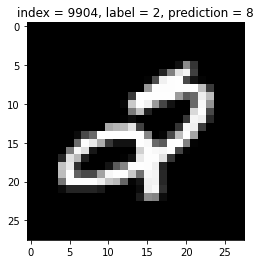

In [16]:
# False Data 확인 및 저장
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

count = 0

example_name = 'CNN TEST'

# 현재 디렉토리 저장
curr_dir = os.getcwd()

# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()

# 디렉토리 이름 충돌 방지를 위해 날짜별로 저장
save_dir = example_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

default_dir = '.'

os.chdir(default_dir)
os.mkdir(save_dir)

# 저장경로 변경
os.chdir(save_dir)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
    
    # 인덱스 문자열
    index_str = str(index_int)

    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 인덱스 정답 오답을 나타내는 문자열
    index_label_prediction_str = 'index = ' + index_str + ', label = ' + label_str + ', prediction = ' + prediction_str
    

    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    plt.title(index_label_prediction_str)

    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')

    plt.savefig(save_image_name)  # 파일저장
    
    count += 1
    
    if count % 10 == 0:
        
        print(count, 'image saved')
            
        
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', count, " data is saved")        

# 원래의 dir 로 복귀
os.chdir(curr_dir)